# Gem price prediction with Regression algorithm

In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
#importing the data
data=pd.read_csv('path')
# checking the data
data.shape

(26967, 11)

# exploratory data analysis

In [3]:
# checking the top 5 records
data.head()

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

In [4]:
#checking the unique values in variable clarity 
data['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [5]:
#droping the unnamed column
data=data.iloc[:, 1:]

In [6]:
#checking the datatypes of columns
data_dtype=data.dtypes
#checking the missing data % in each column
data_missing=data.isnull().sum()/data.shape[0]*100
#checking the measure of central tendeny, percentile values of each column 
data_desc = data.describe(include='all')
#preparing the dataset for the missing value%,datatypes,describe()
dtls_1=pd.DataFrame(data_missing, columns=['missing'])
dtls_2=pd.DataFrame(data_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(data_desc)
dtls_3=dtls_3.T
#concatenation the above three datasets  
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

missing    dtype  count unique    top   freq      mean       std  \
depth    2.58464  float64  26270    NaN    NaN    NaN   61.7451   1.41286   
carat    0.00000  float64  26967    NaN    NaN    NaN  0.798375  0.477745   
cut      0.00000   object  26967      5  Ideal  10816       NaN       NaN   
color    0.00000   object  26967      7      G   5661       NaN       NaN   
clarity  0.00000   object  26967      8    SI1   6571       NaN       NaN   
table    0.00000  float64  26967    NaN    NaN    NaN   57.4561   2.23207   
x        0.00000  float64  26967    NaN    NaN    NaN   5.72985   1.12852   
y        0.00000  float64  26967    NaN    NaN    NaN   5.73357   1.16606   
z        0.00000  float64  26967    NaN    NaN    NaN   3.53806  0.720624   
price    0.00000    int64  26967    NaN    NaN    NaN   3939.52   4024.86   

          min   25%   50%   75%    max  
depth    50.8    61  61.8  62.5   73.6  
carat     0.2   0.4   0.7  1.05    4.5  
cut       NaN   NaN   NaN   NaN    NaN  
color     NaN   NaN   NaN   NaN    NaN  
clarity   NaN   NaN   NaN   NaN    NaN  
table      49    56    57    59     79  
x           0  4.71  5.69  6.55  10.23  
y           0  4.71  5.71  6.54   58.9  
z           0   2.9  3.52  4.04   31.8  
price     326   945  2375  5360  18818

# Treating the missing values

In [7]:
# Treating the missing values with mean
data['depth'].fillna(data['depth'].mean(), inplace=True)

# drop duplicates

In [8]:
#checking and removing the duplicates
print(f'before removing duplicates{data.shape}')
data.drop_duplicates(inplace=True)
print(f'after removing duplicates{data.shape}')

before removing duplicates(26967, 10)
after removing duplicates(26933, 10)


# Univariate Analysis

([<matplotlib.patches.Wedge at 0x1eedcab2a60>,
 [Text(-1.095025647098324, 0.3513101652342228, 'Ideal'),
  Text(0.20850352181477555, -1.130940441133323, 'Premium'),
  Text(1.142036414301068, 0.13510302887189451, 'Very Good'),
  Text(0.5167095142293274, 1.0273807852519399, 'Good'),
  Text(0.11811472570066442, 1.294623077027695, 'Fair')],
 [Text(-0.61892753966427, 0.19856661513238677, '40.12%'),
  Text(0.1178498166779166, -0.6392272058579652, '25.57%'),
  Text(0.6454988428658209, 0.07636258153628821, '22.38%'),
  Text(0.2920532036948372, 0.5806934873163138, '9.04%'),
  Text(0.07268598504656272, 0.7966911243247353, '2.90%')])

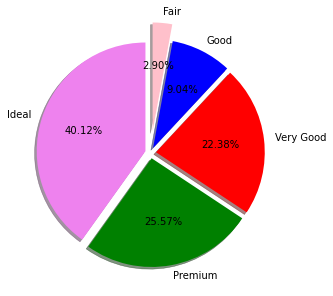

In [9]:
#ploting the pie chart
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(data['cut'].value_counts().values,
        labels=data['cut'].value_counts().index,
        startangle=90,
        colors=['violet', 'green', 'red', 'blue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')




In [10]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

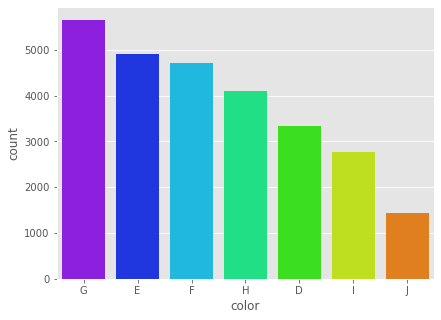

In [11]:
#ploting the histogram
plt.subplot(132)
sns.countplot(data['color'], palette='ocean', order=data['color'].value_counts().index)
sns.countplot(data['color'], palette='gist_rainbow_r',order=data['color'].value_counts().index)



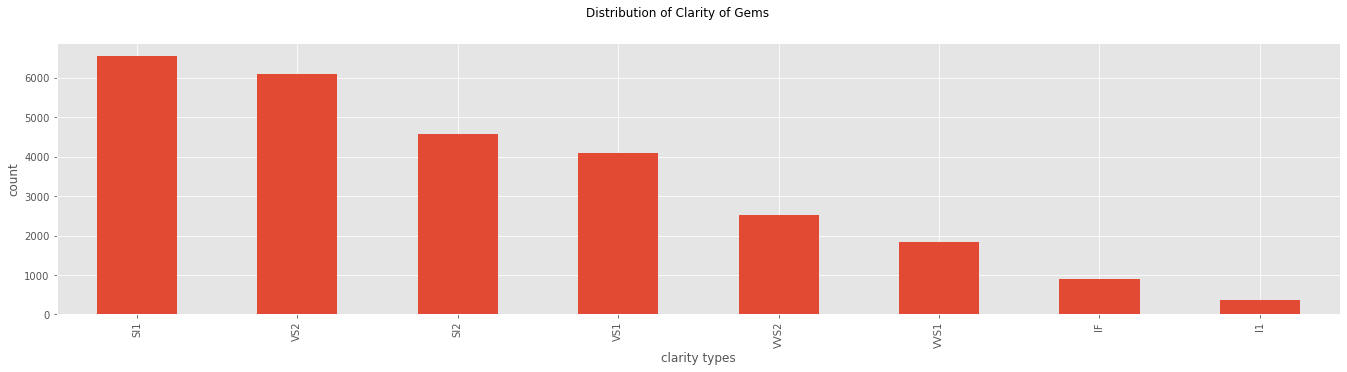

In [12]:
#ploting the histogram 
data["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Clarity of Gems')
plt.show()

C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

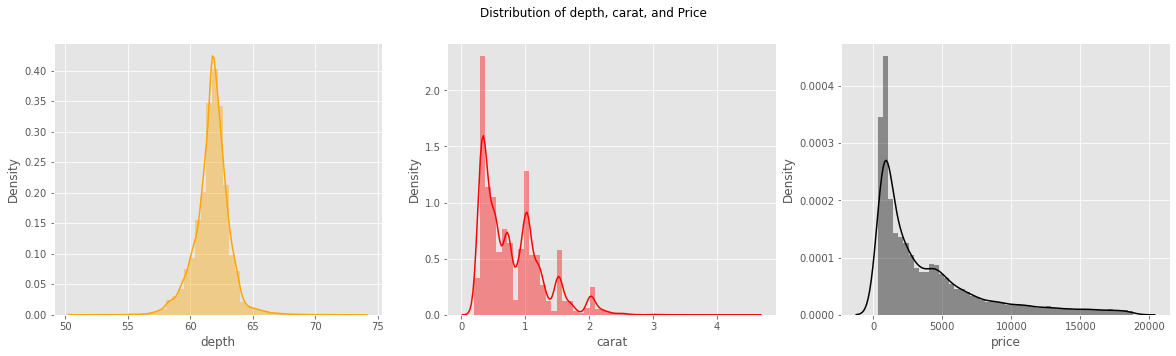

In [13]:
#ploting the distribution of the variables
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(data['depth'], color='orange')

plt.subplot(132)
sns.distplot(data['carat'], color='red')

plt.subplot(133)
sns.distplot(data['price'], color='black')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


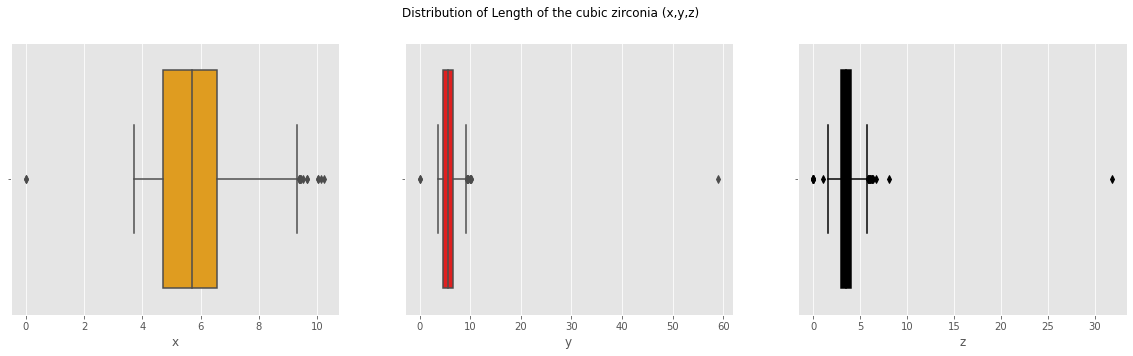

In [14]:
#ploting the box plots
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(data['x'], color='orange')

plt.subplot(132)
sns.boxplot(data['y'], color='red')

plt.subplot(133)
sns.boxplot(data['z'], color='black')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

# Bivariate Analysis

C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


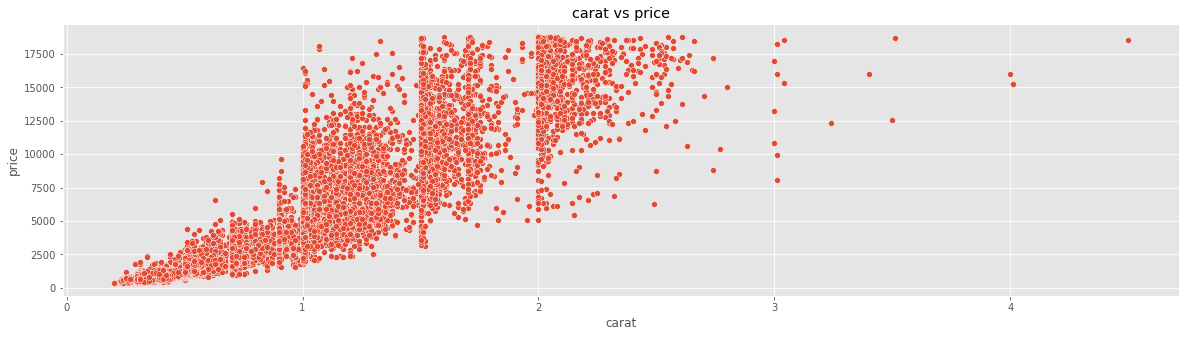

In [15]:
#ploting the scatter plot
sns.scatterplot(data['carat'], data['price'])
plt.title('carat vs price')
plt.show()

C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


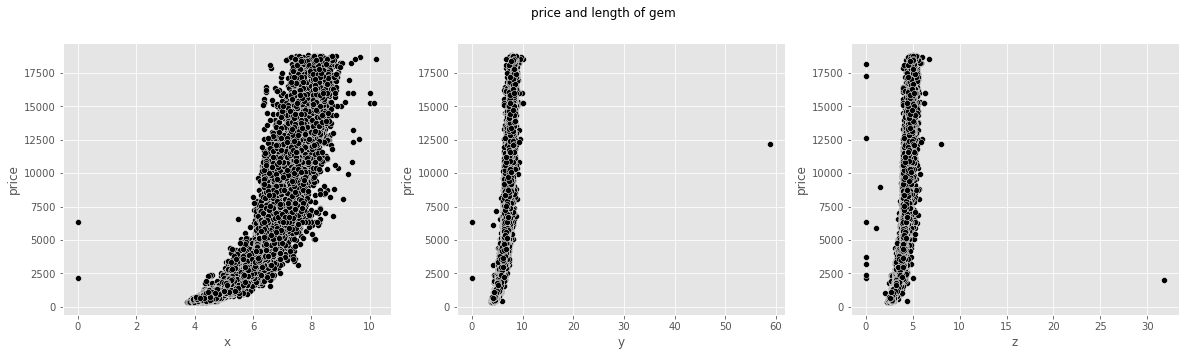

In [16]:
#ploting the scatter plot
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(data['x'], data['price'], color='black')

plt.subplot(132)
sns.scatterplot(data['y'], data['price'], color='black')

plt.subplot(133)
sns.scatterplot(data['z'], data['price'], color='black')

plt.suptitle('price and length of gem')
plt.show()

In [17]:
#we have few zeros in gem size and length, either we can drop or replace with proper value.
#I'll drop coz dropping 9 from 27000 will not gonna affect much
data=data[~((data['x']==0)|(data['y']==0)|(data['z']==0))]

In [18]:
#We have outliers in y and z let's cap them with most frequent value

data['y'].values[data['y'].values>50]=data['y'].mode()[0]
data['z'].values[data['z'].values>30]=data['z'].mode()[0]

C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dinesh ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='price'>

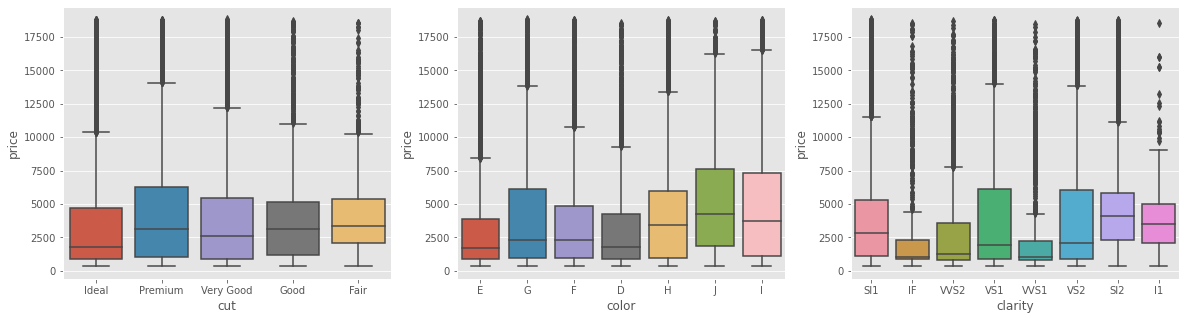

In [19]:
plt.subplot(131)
sns.boxplot(data['cut'], data['price'])

plt.subplot(132)
sns.boxplot(data['color'], data['price'])

plt.subplot(133)
sns.boxplot(data['clarity'], data['price'])

In [20]:
#descriptive stats information about each categories in each variables
data[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='RdGy')


In [21]:
data[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='RdGy')


In [22]:
data[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='RdGy')

In [23]:
data

carat        cut color clarity  depth  table     x     y     z  price
0       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
26962   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

[26925 rows x 10 columns]

# Data Preprocessing

In [24]:
#fit and transform train data encoding
scale_mapper = {'Fair': 1, 'Good': 2,'Very Good': 3,'Premium':4,'Ideal': 5}
data["cut"] = data["cut"].replace(scale_mapper)

In [25]:
data.head()

carat  cut color clarity  depth  table     x     y     z  price
0   0.30    5     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1   0.33    4     G      IF   60.8   58.0  4.42  4.46  2.70    984
2   0.90    3     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3   0.42    5     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4   0.31    5     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

In [26]:
#Creating the dummy variables 
colors_dummies=pd.get_dummies(data['color'], drop_first=True)
clarity_dummies=pd.get_dummies(data['clarity'], drop_first=True)
dummies=pd.concat([colors_dummies, clarity_dummies], axis=1)

In [27]:
#combining data and dummies
data=pd.concat([data, dummies], axis=1)

In [28]:
#Droping the original variables
data.drop(['color', 'clarity'], axis=1, inplace=True)

In [29]:
#constructing the correlation matrix
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [30]:
#droping the x,y,z variables
data.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [31]:
# dividing the data  x as independent variables and y as dependent variables
x=data.drop('price', axis=1)
y=data['price']

In [41]:
#splitting the data into Train and Test
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=10)

# Model building and Evaluation

In [49]:
#buliding the random forest 
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
#evaluating the train score
model.score(X_train, y_train)


0.9957449000241686

In [44]:
#evaluating the test score
model.score(X_test, y_test)

0.9720246745800841

In [35]:
import joblib
#coverting the model into pikel file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [36]:
X_train.head(1)

carat  cut  depth  table  E  F  G  H  I  J  IF  SI1  SI2  VS1  VS2  \
7905   1.01    4   58.9   60.0  0  1  0  0  0  0   0    1    0    0    0   

      VVS1  VVS2  
7905     0     0

In [51]:
clf = joblib.load('model.pkl')